In [43]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [44]:
#Loading Data  
gold_data=pd.read_csv('new_data.csv')

In [45]:
#Printing first 5 rows and columns
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [46]:
#Printing last 5 rows and columns
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
4225,25-09-2023,1841.285580,129.706183,71.249520,13.198525,1.233159
4226,26-09-2023,2797.329168,126.729140,46.448135,24.758896,1.075114
4227,27-09-2023,1691.418297,83.450957,53.909334,44.625172,1.483336
4228,28-09-2023,2327.914202,126.688778,30.521861,21.799082,1.311898
4229,29-09-2023,1468.219123,81.586744,77.870222,16.725314,1.332160


In [47]:
#Number of rows and columns
gold_data.shape

(4230, 6)

In [48]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4230 non-null   object 
 1   SPX      4230 non-null   float64
 2   GLD      4230 non-null   float64
 3   USO      4230 non-null   float64
 4   SLV      4230 non-null   float64
 5   EUR/USD  4230 non-null   float64
dtypes: float64(5), object(1)
memory usage: 198.4+ KB


In [49]:
#Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000
mean,1700.837508,114.738583,37.725698,23.408102,1.269414
std,563.266296,21.506670,20.714108,9.324848,0.139102
min,676.530029,70.000000,7.960000,8.850000,1.000043
25%,1238.170437,98.322317,20.782631,15.910000,1.138823
50%,1669.848745,114.870436,35.590680,19.930009,1.288874
75%,2121.804447,124.967500,47.840329,30.776877,1.372360
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [50]:
#Checking the missing values in the data
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

CORREALATION

In [51]:
corr=gold_data.corr()

C:\Users\91892\AppData\Local\Temp\ipykernel_9012\3667303805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=gold_data.corr()


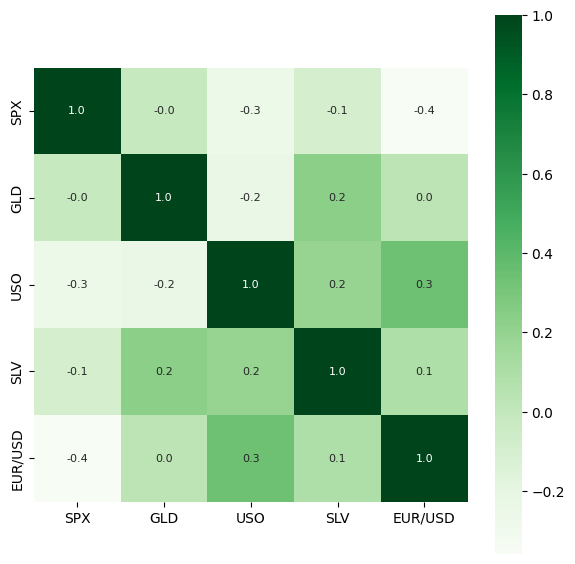

In [52]:
#Heatmap
plt.figure(figsize=(7,7))
sns.heatmap(corr,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8}, cmap='Greens')
plt.show()

In [53]:
#Correlation values of GLD
print(corr["GLD"])

SPX       -0.018491
GLD        1.000000
USO       -0.233427
SLV        0.230473
EUR/USD    0.032736
Name: GLD, dtype: float64


C:\Users\91892\AppData\Local\Temp\ipykernel_9012\3230601721.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"],color="blue")


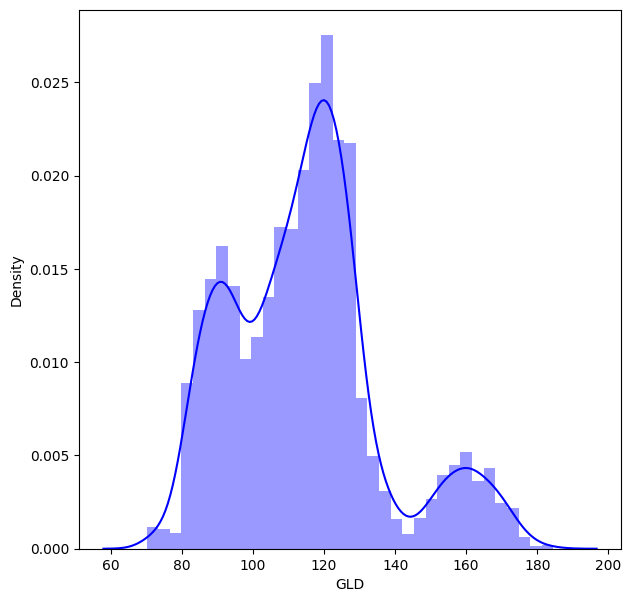

In [54]:
#Distribution of GLD price
plt.figure(figsize=(7,7))
sns.distplot(gold_data["GLD"],color="blue")
plt.show()

In [55]:
#Splitting the data into features and targets
X=gold_data.drop(columns=["GLD","Date"],axis=1)
Y=gold_data["GLD"]

In [56]:
print(X)
print(Y)

              SPX        USO        SLV   EUR/USD
0     1447.160034  78.470001  15.180000  1.471692
1     1447.160034  78.370003  15.285000  1.474491
2     1411.630005  77.309998  15.167000  1.475492
3     1416.180054  75.500000  15.053000  1.468299
4     1390.189941  76.059998  15.590000  1.557099
...           ...        ...        ...       ...
4225  1841.285580  71.249520  13.198525  1.233159
4226  2797.329168  46.448135  24.758896  1.075114
4227  1691.418297  53.909334  44.625172  1.483336
4228  2327.914202  30.521861  21.799082  1.311898
4229  1468.219123  77.870222  16.725314  1.332160

[4230 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
4225    129.706183
4226    126.729140
4227     83.450957
4228    126.688778
4229     81.586744
Name: GLD, Length: 4230, dtype: float64


In [57]:
#Splitting into Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training using Random Forest Regressor

In [58]:
model= RandomForestRegressor(n_estimators=100)

In [59]:
#Training the model
model.fit(X_train,Y_train)

RandomForestRegressor()

In [60]:
#Prediction on the test Data
test_predict=model.predict(X_test)

In [61]:
#R Squarred Error on the Test Data
error_score = metrics.r2_score(Y_test, test_predict)

In [62]:
print("R squarred error: ",error_score)

R squarred error:  0.7487965567632624


In [63]:
#Compare Actual Values and Predicted Values
Y_test=list(Y_test)

In [72]:
#Checking Accuracy
model.score(X_train,Y_train)

0.9612127929362141

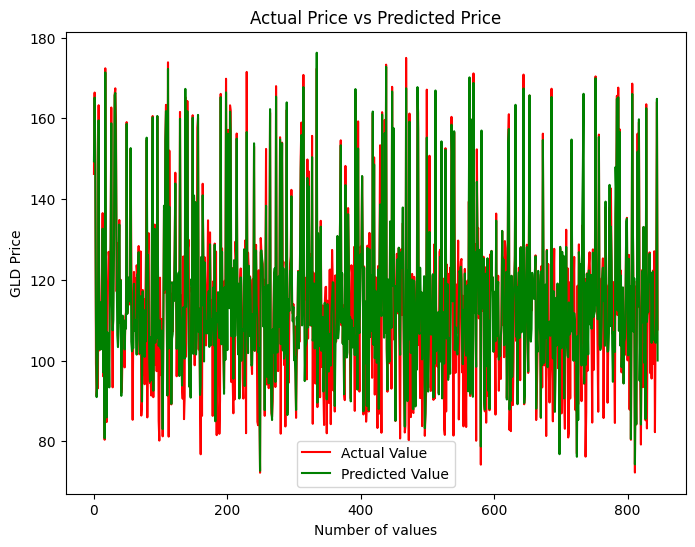

In [64]:
plt.figure(figsize=(8,6))
plt.plot(Y_test,color="red",label="Actual Value")
plt.plot(test_predict,color="green",label="Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [65]:

input_data = (147.160034,78.470001,15.1800,1.471692)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)[0]

prediction

c:\Users\91892\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


94.89373102599997

In [66]:
import pickle


In [67]:
pickle.dump(model,open("gold_predictor.pkl","wb"))

In [68]:
regressor = pickle.load(open('gold_predictor.pkl',"rb"))

In [69]:
predic = regressor.predict(input_data_reshaped)[0]

c:\Users\91892\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [70]:
predic

94.89373102599997